# Q1 and Q3 and Q4

Generate Random data to train a linear regression problem using Pytorch

Epoch [100/1000], Loss: 0.0068
Epoch [200/1000], Loss: 0.0066
Epoch [300/1000], Loss: 0.0066
Epoch [400/1000], Loss: 0.0066
Epoch [500/1000], Loss: 0.0066
Epoch [600/1000], Loss: 0.0066
Epoch [700/1000], Loss: 0.0066
Epoch [800/1000], Loss: 0.0066
Epoch [900/1000], Loss: 0.0066
Epoch [1000/1000], Loss: 0.0066


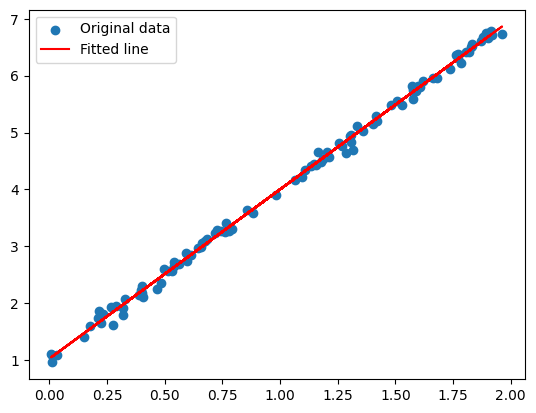

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate synthetic data
torch.manual_seed(42)  # For reproducibility
X = 2 * torch.rand(100, 1)  # Random input values between 0 and 2
y = 3 * X + 1 + 0.1 * torch.randn(100, 1)  # Linear relationship with some noise

# Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input feature, one output

    def forward(self, x):
        return self.linear(x)

# Instantiate the model, loss function, and optimizer
model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
num_epochs = 1000

for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(X)

    # Compute the loss
    loss = criterion(y_pred, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the results
plt.scatter(X.numpy(), y.numpy(), label='Original data')
plt.plot(X.numpy(), model(X).detach().numpy(), 'r', label='Fitted line')
plt.legend()
plt.show()


# Q2 Experiment with your learning rate. You should see that large learning rate will cause gradient to explode. Print a learning rate that makes the optimizer explode

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

# Generate synthetic data
torch.manual_seed(42)  # For reproducibility
X = 2 * torch.rand(100, 1)  # Random input values between 0 and 2
y = 3 * X + 1 + 0.1 * torch.randn(100, 1)  # Linear relationship with some noise

# Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input feature, one output

    def forward(self, x):
        return self.linear(x)

# Set a range of learning rates between 0 and 1 to experiment with
learning_rates = [0.01, 0.1, 0.5, 0.8, 1.0]

for lr in learning_rates:
    print(f"\nExperimenting with learning rate: {lr}")

    # Instantiate the model, loss function, and optimizer
    model = LinearRegressionModel()
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    # Training loop
    num_epochs = 1000

    for epoch in range(num_epochs):
        # Forward pass
        y_pred = model(X)

        # Compute the loss
        loss = criterion(y_pred, y)

        # Check if the loss becomes NaN
        if torch.isnan(loss):
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: NaN')
            break

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # # Print the loss every 100 epochs
        # if (epoch + 1) % 100 == 0:
        #     print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

    else:
        print("Training completed without NaN loss.")



Experimenting with learning rate: 0.01
Training completed without NaN loss.

Experimenting with learning rate: 0.1
Training completed without NaN loss.

Experimenting with learning rate: 0.5
Epoch [383/1000], Loss: NaN

Experimenting with learning rate: 0.8
Epoch [93/1000], Loss: NaN

Experimenting with learning rate: 1.0
Epoch [72/1000], Loss: NaN


# Q5 Add an outlier sample data, and train one model with MSE loss and one model with MAE loss

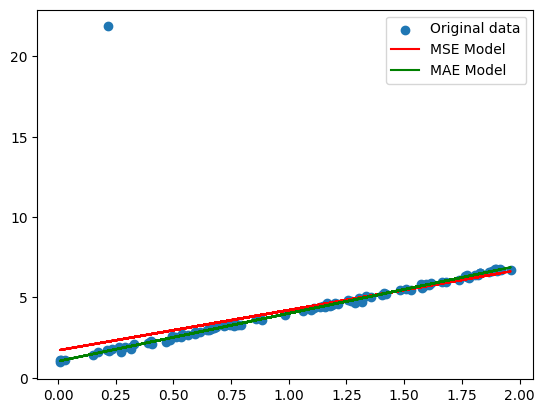

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate synthetic data with an outlier
torch.manual_seed(42)  # For reproducibility
X = 2 * torch.rand(100, 1)  # Random input values between 0 and 2
y = 3 * X + 1 + 0.1 * torch.randn(100, 1)  # Linear relationship with some noise
y[75] = y[75] + 20  # Add an outlier to the 75th sample

# Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input feature, one output

    def forward(self, x):
        return self.linear(x)

# Training loop function to generalize training process
def train_model(model, criterion, optimizer, num_epochs=1000):
    for epoch in range(num_epochs):
        # Forward pass
        y_pred = model(X)

        # Compute the loss
        loss = criterion(y_pred, y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # # Print the loss every 100 epochs
        # if (epoch + 1) % 100 == 0:
        #     print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Model with MSE loss
mse_model = LinearRegressionModel()
mse_criterion = nn.MSELoss()
mse_optimizer = optim.SGD(mse_model.parameters(), lr=0.01)

# print("Training model with MSE loss:")
train_model(mse_model, mse_criterion, mse_optimizer)

# Model with MAE loss
mae_model = LinearRegressionModel()
mae_criterion = nn.L1Loss()  # Use L1Loss for Mean Absolute Error
mae_optimizer = optim.SGD(mae_model.parameters(), lr=0.01)

# print("\nTraining model with MAE loss:")
train_model(mae_model, mae_criterion, mae_optimizer)

# Plot the results
plt.scatter(X.numpy(), y.numpy(), label='Original data')
plt.plot(X.numpy(), mse_model(X).detach().numpy(), 'r', label='MSE Model')
plt.plot(X.numpy(), mae_model(X).detach().numpy(), 'g', label='MAE Model')
plt.legend()
plt.show()


# Q6 
Adjust and experiment the outlier example in terms of input value and output value, and compare the output regression line. You should see the difference in results between models trained with MSE and models trained with MAE. Draw results from at least 3 examples and display the visual results in one graph.

Outlier Example 1:
Outlier Point 1: (x, y_GT) = (0.2176, 21.8556), (x, y_pred_MSE) = (0.2176, 2.5381), (x, y_pred_MAE) = (0.2176, 1.6955)
Outlier Example 2:
Outlier Point 2: (x, y_GT) = (0.5390, -7.3490), (x, y_pred_MSE) = (0.5390, 3.2500), (x, y_pred_MAE) = (0.5390, 2.6480)
Outlier Example 3:
Outlier Point 3: (x, y_GT) = (0.0101, 15.9570), (x, y_pred_MSE) = (0.0101, 2.0783), (x, y_pred_MAE) = (0.0101, 1.0803)


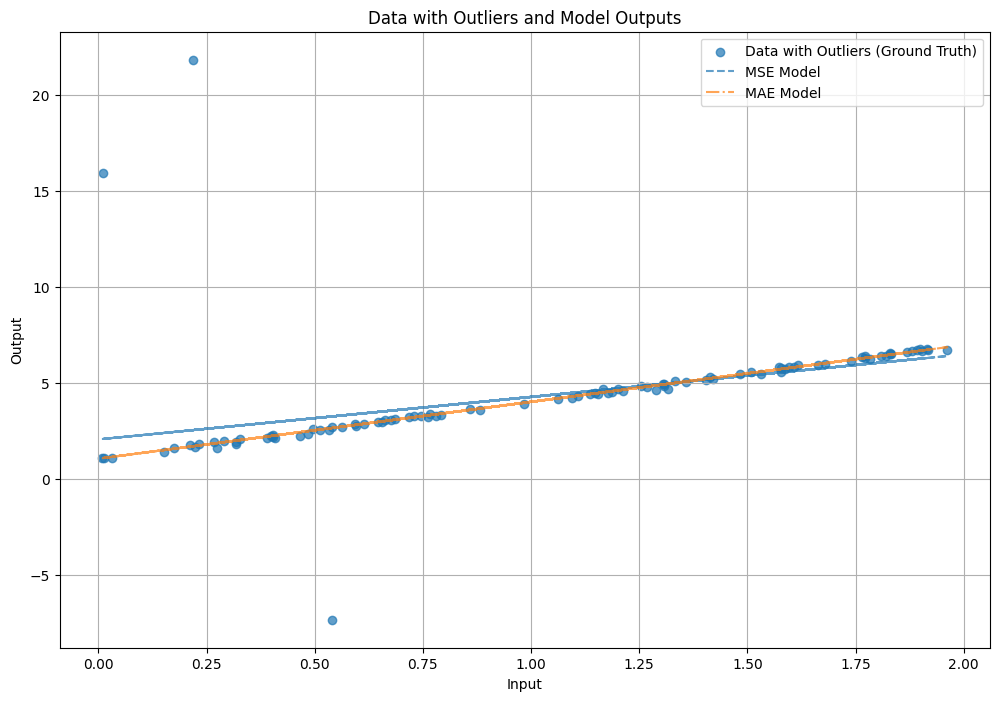

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Function to generate synthetic data with multiple outliers
def generate_data(outliers):
    torch.manual_seed(42)  # For reproducibility
    X = 2 * torch.rand(100, 1)  # Random input values between 0 and 2
    y = 3 * X + 1 + 0.1 * torch.randn(100, 1)  # Linear relationship with some noise
    for outlier in outliers:
        index, value = outlier
        y[index] = y[index] + value  # Add an outlier
    return X, y

# Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input feature, one output

    def forward(self, x):
        return self.linear(x)

# Training loop function to generalize training process
def train_model(model, criterion, optimizer, num_epochs=1000):
    for epoch in range(num_epochs):
        # Forward pass
        y_pred = model(X)

        # Compute the loss
        loss = criterion(y_pred, y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # # Print the loss every 100 epochs
        # if (epoch + 1) % 100 == 0:
        #     print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Generate data with three outlier points
outliers = [(75, 20), (25, -10), (50, 15)]
X, y_GT = generate_data(outliers)

# Model with MSE loss
mse_model = LinearRegressionModel()
mse_criterion = nn.MSELoss()
mse_optimizer = optim.SGD(mse_model.parameters(), lr=0.01)

# print("Training MSE model:")
train_model(mse_model, mse_criterion, mse_optimizer)

# Model with MAE loss
mae_model = LinearRegressionModel()
mae_criterion = nn.L1Loss()  # Use L1Loss for Mean Absolute Error
mae_optimizer = optim.SGD(mae_model.parameters(), lr=0.01)

# print("\nTraining MAE model:")
train_model(mae_model, mae_criterion, mae_optimizer)

# Get predictions from both models
y_pred_mse = mse_model(X)
y_pred_mae = mae_model(X)

# Print (x, y_GT) and (x, y_pred) for all outlier points
for i, outlier in enumerate(outliers, 1):
    index, value = outlier
    x_outlier = X[index].item()
    y_GT_outlier = y_GT[index].item()
    y_pred_mse_outlier = y_pred_mse[index].item()
    y_pred_mae_outlier = y_pred_mae[index].item()
    print(f"Outlier Example {i}:")
    print(f"Outlier Point {i}: (x, y_GT) = ({x_outlier:.4f}, {y_GT_outlier:.4f}), (x, y_pred_MSE) = ({x_outlier:.4f}, {y_pred_mse_outlier:.4f}), (x, y_pred_MAE) = ({x_outlier:.4f}, {y_pred_mae_outlier:.4f})")

# Plot the results
plt.figure(figsize=(12, 8))
plt.scatter(X.numpy(), y_GT.numpy(), label='Data with Outliers (Ground Truth)', alpha=0.7)
plt.plot(X.numpy(), y_pred_mse.detach().numpy(), '--', label='MSE Model', alpha=0.7)
plt.plot(X.numpy(), y_pred_mae.detach().numpy(), '-.', label='MAE Model', alpha=0.7)
plt.title("Data with Outliers and Model Outputs")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()
